In [1]:
# Load environment variables and set up auto-reload
from dotenv import load_dotenv
load_dotenv()

%load_ext autoreload
%autoreload 2

In [12]:
%%writefile studio/simpleGraph.py

from dotenv import load_dotenv
load_dotenv()

from typing import Annotated

from langchain.chat_models import init_chat_model
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver  # Add this import

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = init_chat_model("anthropic:claude-3-5-sonnet-latest")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)


# Add checkpointer for persistence
checkpointer = MemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer)  # Add checkpointer her

Overwriting studio/simpleGraph.py


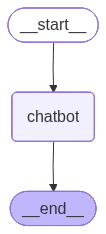

In [13]:
from studio.simpleGraph import graph

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [14]:
import uuid

# Generate a unique thread ID
thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id": thread_id}}

In [15]:
config

{'configurable': {'thread_id': 'a317db67-797c-4983-bd74-b8bc20aae5ad'}}

In [16]:
graph.invoke({"messages": [{"role":"human", "content": "hello"}]},config=config)

{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='267aa706-4e12-4c49-9a0a-6bcc881ce5cf'),
  AIMessage(content='Hi! How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_01DiSyM5LHxdVRB5CEPRAtfj', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 8, 'output_tokens': 12, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-3-5-sonnet-20241022', 'model_provider': 'anthropic'}, id='lc_run--2226d864-8d8f-47eb-a288-4870a6953626-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_read': 0, 'cache_creation': 0, 'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}})]}

In [17]:
graph.invoke({"messages": [{"role":"human", "content": "My name is Ajit. I live in Greater Noida"}]},config=config)

{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='267aa706-4e12-4c49-9a0a-6bcc881ce5cf'),
  AIMessage(content='Hi! How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_01DiSyM5LHxdVRB5CEPRAtfj', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 8, 'output_tokens': 12, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-3-5-sonnet-20241022', 'model_provider': 'anthropic'}, id='lc_run--2226d864-8d8f-47eb-a288-4870a6953626-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_creation': 0, 'cache_read': 0, 'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}}),
  HumanMessage(content='My name is Ajit. I live in Greater No

In [18]:
graph.invoke({"messages": [{"role":"human", "content": "What is my name? And country do I live in? What is my gender?"}]},config=config)

{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='267aa706-4e12-4c49-9a0a-6bcc881ce5cf'),
  AIMessage(content='Hi! How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_01DiSyM5LHxdVRB5CEPRAtfj', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 8, 'output_tokens': 12, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-3-5-sonnet-20241022', 'model_provider': 'anthropic'}, id='lc_run--2226d864-8d8f-47eb-a288-4870a6953626-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_creation': 0, 'cache_read': 0, 'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}}),
  HumanMessage(content='My name is Ajit. I live in Greater No

In [19]:
graph.invoke({"messages": [{"role":"human", "content": "Can't you guess the gender from my name?"}]},config=config)

{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='267aa706-4e12-4c49-9a0a-6bcc881ce5cf'),
  AIMessage(content='Hi! How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_01DiSyM5LHxdVRB5CEPRAtfj', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 8, 'output_tokens': 12, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-3-5-sonnet-20241022', 'model_provider': 'anthropic'}, id='lc_run--2226d864-8d8f-47eb-a288-4870a6953626-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_creation': 0, 'cache_read': 0, 'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}}),
  HumanMessage(content='My name is Ajit. I live in Greater No